#### Rosenblatt Perceptron

In [262]:
import numpy as np

In [263]:
class Perceptron:
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
    initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    errors_ : list
        Number of mis-classifications (updates) in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        Returns
        -------
        self : object

        """

        # having seed to random to recreate same scinario
        rgen = np.random.RandomState(self.random_state)

        # initializing weight vector
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
            size=X.shape[1])

        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)

            self.errors_.append(errors)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_ # w^{t}x + b

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [264]:
import os
import pandas as pd

In [265]:
s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'

In [266]:
df = pd.read_csv('iris.csv',
    header=None,
    encoding='utf-8')

In [267]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [268]:
import matplotlib.pyplot as plt

In [269]:
# select setosa and versicolor
y = df.iloc[:100, 4].values

In [270]:
y = np.where(y == 'setosa', 0, 1) # replacing labels with binary

In [271]:
# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

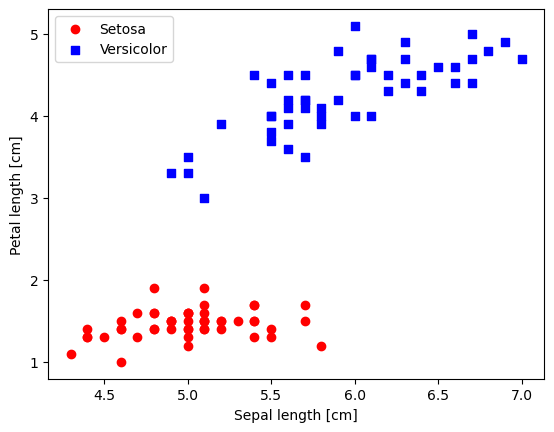

In [272]:
 # plot data
plt.scatter(X[:50, 0], X[:50, 1],
    color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
    color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [273]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

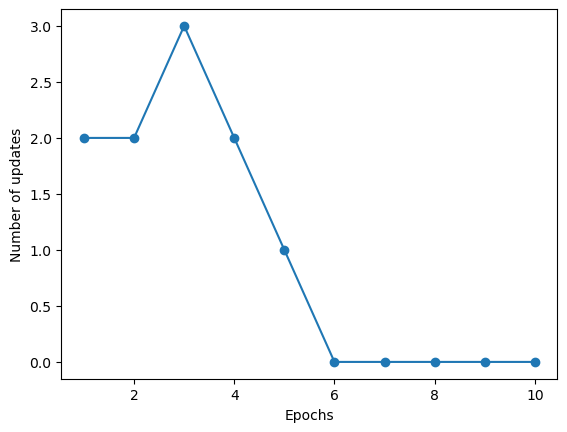

In [274]:
plt.plot(range(1, len(ppn.errors_) + 1),
    ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show() 

In [275]:
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [276]:
from matplotlib.colors import ListedColormap

#### Plot

In [277]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

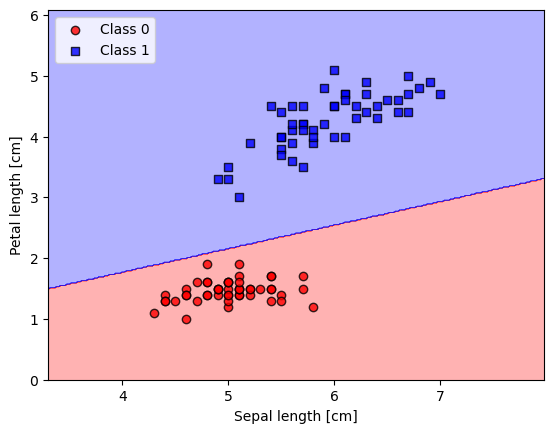

In [278]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [279]:
ppn.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [280]:
print(ppn.net_input([X]))

[[-0.72472298 -0.65397167 -0.6746086  -0.45645646 -0.68934732 -0.55668521
  -0.5478447  -0.59795908 -0.47709339 -0.56258342 -0.7394617  -0.43581953
  -0.61859601 -0.71588247 -1.15512905 -0.84558866 -0.92223818 -0.72472298
  -0.66281217 -0.63333473 -0.55668521 -0.63333473 -0.91339768 -0.45055825
  -0.16165479 -0.50657083 -0.50657083 -0.66871039 -0.76009863 -0.40044387
  -0.43581953 -0.7394617  -0.66871039 -0.86622559 -0.56258342 -0.87212381
  -0.95761384 -0.56258342 -0.56848164 -0.63333473 -0.78073557 -0.60385729
  -0.56848164 -0.50657083 -0.26778176 -0.61859601 -0.54194649 -0.5478447
  -0.70408604 -0.68934732  1.61895162  1.64842906  1.83710377  1.50986874
   1.70444165  1.89605865  1.86658121  1.08240496  1.669066    1.52460746
   1.22980579  1.55114261  1.33299047  1.93733252  1.10894011  1.45091386
   1.9314343   1.49513002  1.71918037  1.38310484  2.09947207  1.29761481
   2.04935769  1.93733252  1.46565258  1.48628951  1.78109118  1.99924332
   1.78993168  0.98217621  1.32709225  

In [281]:
ppn.w_

array([-0.35375655,  0.91388244])

In [282]:
ppn.net_input([7, 1])

-1.7624133886800724

#### Adaline Perceptron

In [283]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_: list
        Mean squared error loss function values in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        Returns
        -------
        self : object

        """

        # having seed to random to recreate same scinario
        rgen = np.random.RandomState(self.random_state)

        # initializing weight vector
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
            size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for _ in range(self.n_iter):

            net_input = self.net_input(X)
            output = self.activation(net_input)

            errors = (y - output)

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def activation(self, X):
        """Compute linear activation"""
        return X

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_ # w^{t}x + b

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


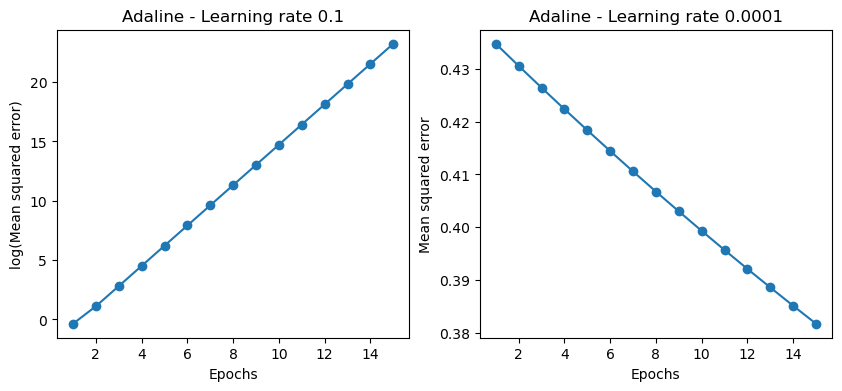

In [284]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
    np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
    ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [285]:
X_std = X.copy()

In [286]:
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X.std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [287]:
X_std

array([[-0.21621619, -1.01435952],
       [-0.33277478, -1.01435952],
       [-0.44933337, -1.08374115],
       [-0.50761267, -0.94497788],
       [-0.27449549, -1.01435952],
       [-0.0413783 , -0.80621461],
       [-0.50761267, -1.01435952],
       [-0.27449549, -0.94497788],
       [-0.62417126, -1.01435952],
       [-0.33277478, -0.94497788],
       [-0.0413783 , -0.94497788],
       [-0.39105408, -0.87559625],
       [-0.39105408, -1.01435952],
       [-0.68245056, -1.22250442],
       [ 0.19173888, -1.15312279],
       [ 0.13345959, -0.94497788],
       [-0.0413783 , -1.08374115],
       [-0.21621619, -1.01435952],
       [ 0.13345959, -0.80621461],
       [-0.21621619, -0.94497788],
       [-0.0413783 , -0.80621461],
       [-0.21621619, -0.94497788],
       [-0.50761267, -1.29188606],
       [-0.21621619, -0.80621461],
       [-0.39105408, -0.66745134],
       [-0.27449549, -0.87559625],
       [-0.27449549, -0.87559625],
       [-0.15793689, -0.94497788],
       [-0.15793689,

In [288]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

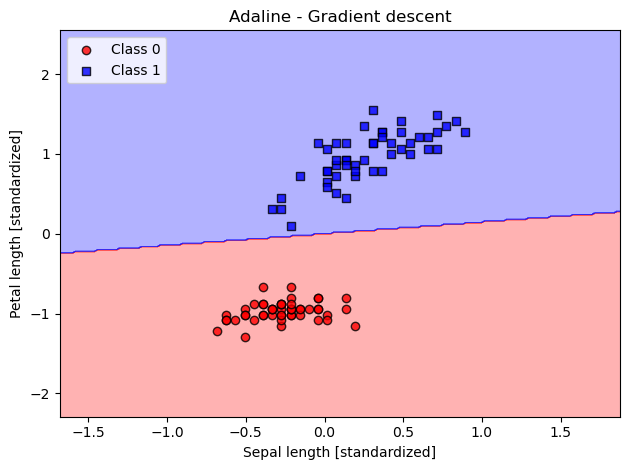

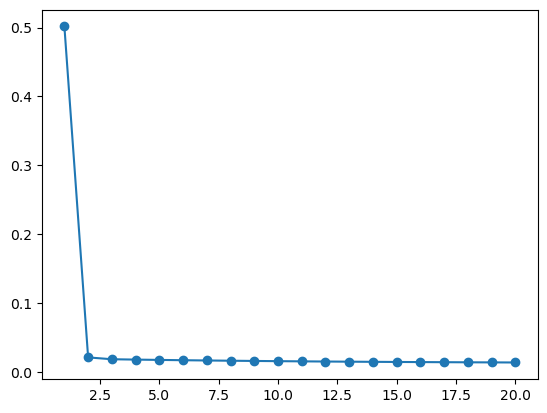

In [289]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),
    ada_gd.losses_, marker='o')